# Let's predict the value of boston house price 

Before getting started to the data set, first, let's understand the dataset that which data contains this dataset. This is a pre-installed dataset from sci-kit learn library, so we can easily call it from sklearn.dataset model. This data contains the following columns:  
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    percentage lower status of the population
        - MEDV     Median value of owner-occupied homes in USD 1000's
        - TAX      full-value property-tax rate per USD 10,000

First, let's understand what we are going to calculate in this data. We have to understand that which are dependent value and which is independent values. So, here we can see that "MEDV" is a dependent value because it contains the value of the median value of owner-occupied homes. This means that this value depends on other factors like RM, LSTAT, TAX, AGE. Because these factors are the main amongst the other which are directly proportional to the MEDV, which helps to find the price of houses. 

Let's get started.....

## 1. Import the libraries which we needed to install

In [85]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2. Calling the dataset and convert it into a pandas data frame

After calling the dataset from sklearn.datasets we have to store it into variable **boston**. This dataset has 2 value factors like **data** and **target**, which are in the simple form. So, we have to convert it into a python data frame using **pandas** library.

In [12]:
#Let's load the data and convert it into a python dataframe

boston = load_boston()
boston.feature_names # feature names of a column
data_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
target_df = pd.DataFrame(data=boston['target'], columns=['MEDV'])

You can see that data and target data frames are in separate tabular form so we have to concatenate it and make it one.

In [13]:
# Concate the target data and main data to make a full dataset 

df = pd.concat((data_df,target_df), axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# remove some unwanted columns

for col in ['ZN','NOX','RAD','PTRATIO','B','CRIM','INDUS','CHAS','DIS']:
    del df[col]

In [15]:
df.describe()

,RM,AGE,TAX,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,6.284634,68.574901,408.237154,12.653063,22.532806
std,0.702617,28.148861,168.537116,7.141062,9.197104
min,3.561000,2.900000,187.000000,1.730000,5.000000
25%,5.885500,45.025000,279.000000,6.950000,17.025000
50%,6.208500,77.500000,330.000000,11.360000,21.200000
75%,6.623500,94.075000,666.000000,16.955000,25.000000
max,8.780000,100.000000,711.000000,37.970000,50.000000


In [16]:
# Correleation of the data
df.corr()

,RM,AGE,TAX,LSTAT,MEDV
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
MEDV,0.695360,-0.376955,-0.468536,-0.737663,1.000000


## 3.1 Plot the heatmap to see the correlation of the data

Herewith the help of heatmap we can check the correlation on the graph. We are using the seaborn library for visualization. Have a look at <a href='https://seaborn.pydata.org/'>seaborn</a> library in case you are not familiar with it.

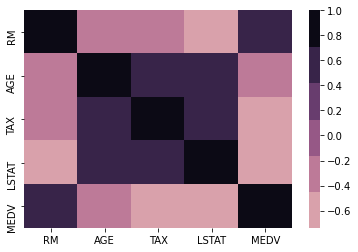

In [17]:
# now let's plot this correlation on heatmap using seaborn
# cubehelix_palette is use for sequantial plate 

ax = sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(light=0.70, dark=0.05))

## 3.2 Pairplot to visualize

Here we will see every single detail of correlation on scatter and bar plot.

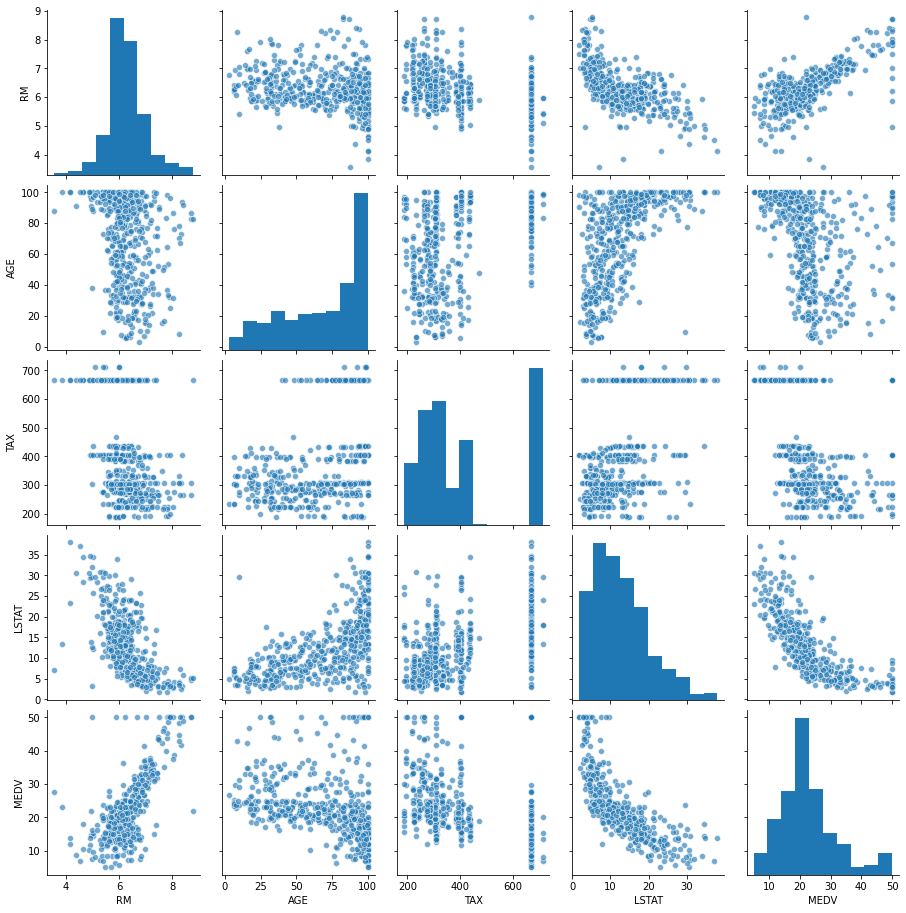

In [18]:
## sns.set(style="ticks", color_codes=True)
sns.pairplot(df,
             plot_kws={'alpha': 0.62},
             diag_kws={'bins':10})

## 4. Regression plot

What we have seen earlier that can be performed on multiple values but the regression plot always has one independent value and one dependent value. So, here we plot the linear regression plot using <a href='https://seaborn.pydata.org/generated/seaborn.regplot.html'>regplot</a>. The purple colour linear graph is between RM as independent value and MEDV as a dependent value. In the green colour graph, LSTAT values are as independent value and MEDV values are as dependent value.

Here, we have used the <a href='https://medium.com/r?url=https%3A%2F%2Fmatplotlib.org%2Fapi%2F_as_gen%2Fmatplotlib.pyplot.subplot.html'>subplots()</a> method of matplotlib.pyplot to plot more than one plot at a time. To show data on the regression plot we have used regplot function of a seaborn library.

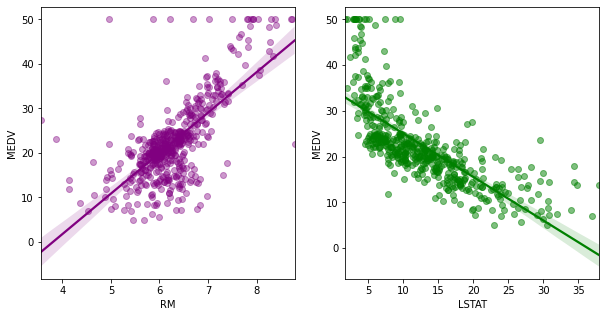

In [19]:
# ploting linear regression of MEDV with RM and LSTAT

fig,ax = plt.subplots(1,2, figsize= (10,5))
sns.regplot('RM','MEDV',df,ax=ax[0],scatter_kws={'alpha':0.40}, color='purple')
#g.set(xlim=(0,10))  this is for to resize the limit of x-axis 
sns.regplot('LSTAT','MEDV',df, ax=ax[1],scatter_kws={'alpha':0.50}, color='green')

## 5. Create the linear model

We can create a simple model but here I created a function called "linear_model" which will calculate the linear model, prediction of the value and mean square error.

In [21]:
# Let's find mean squared error

def linear_model(df,feature, target='MEDV'):
    #first let's get x and y 
    x = df[feature].values.reshape(-1,1)
    y = df[target].values
    print('{} ~ {}'.format(target,feature))
    
    #build the regression model
    lm = LinearRegression()
    lm.fit(x,y)
    
    #coefficient and intercept 
    coef = lm.coef_[0]
    intercept = lm.intercept_
    print(intercept,'+',coef,'x')
    
    #predict the model
    y_hat = lm.predict(x)
    MSE = mean_squared_error(y,y_hat)
    print("MSE => ",MSE)
    print('\n')

In [88]:
linear_model(df,'LSTAT')
linear_model(df,'RM')

MEDV ~ LSTAT
34.5538408793831 + -0.9500493537579905 x
MSE =>  38.48296722989415


MEDV ~ RM
-34.670620776438554 + 9.102108981180308 x
MSE =>  43.60055177116956




From the result, we can see that mean_square_error value of LSTAT is slightly lower than RM. So we can say that whenever value provided with the LSTAT the predicted value will show more accuracy.

## 6. Let's take input from the user 

In this section, we will take values from user and predict the value of house prices. 

In [94]:
# Now let's take input from you and model predict you some value

print('--------------------------------------------------')
print("Give me some values and I'll give you prediction")
print('--------------------------------------------------')
val_RM = float(input('Enter number of rooms : '))
val_AGE = float(input('Enter age : '))
val_TAX = float(input('Enter value of full value property TAX :'))
val_LSTAT = float(input('Enter value for Lower status of population : '))
val_MEDV = float(input('Enter Median value of houses : '))

# Create the linear model for prediction 
x = df.iloc[:,:4]
y = df.iloc[:,4]

lm1 = LinearRegression()
lm1.fit(x,y)

# Here you convert your value into numpy array
x_array = [val_RM,val_AGE,val_TAX,val_LSTAT]
feature_x = ['RM','AGE','TAX','LSTAT']

# Convert an array into a dataframe and take new_x as an indpendent variable
x_df = pd.DataFrame(data=x_array, index=feature_x).T
new_x = x.append(x_df, ignore_index=True)

# new_y as a dependent variable
y_df = pd.DataFrame(data=[val_MEDV], index=['MEDV'])
new_y = y.append(y_df, ignore_index=True)

#let's predict the data
new_y_hat = lm1.predict(new_x)

# print the predicted value and MSE value
print('--------------------------------------------------')
print('This is your new predicted value: ',new_y_hat[-1])
print('Mean Squared Error value is : ', mean_squared_error(new_y_hat,new_y))

--------------------------------------------------
Give me some values and I'll give you prediction
--------------------------------------------------
Enter number of rooms : 6.575
Enter age : 65.200
Enter value of full value property TAX :296
Enter value for Lower status of population : 4.98
Enter Median value of houses : 24
--------------------------------------------------
This is your new predicted value:  29.369814712066944
Mean Squared Error value is :  29.465179319638334
